In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import torch 

df = pd.read_csv('epss_scores.csv', skiprows=1)

df

,cve,epss,percentile
0,CVE-1999-0001,0.00383,0.72776
1,CVE-1999-0002,0.02080,0.88940
2,CVE-1999-0003,0.04409,0.92314
3,CVE-1999-0004,0.00917,0.82681
4,CVE-1999-0005,0.91963,0.98905
...,...,...,...
244496,CVE-2024-32963,0.00043,0.08273
244497,CVE-2024-32966,0.00043,0.08273
244498,CVE-2024-32967,0.00044,0.12146
244499,CVE-2024-3019,0.00045,0.14274


In [16]:
# Find the distribution of EPSS probabilities

bins = np.arange(0., 1.1, 0.1)
labels = ['0-0.1', 
          '0.1-0.2', 
          '0.2-0.3', 
          '0.3-0.4', 
          '0.4-0.5', 
          '0.5-0.6', 
          '0.6-0.7', 
          '0.7-0.8', 
          '0.8-0.9', 
          '0.9-1']

df['binned'] = pd.cut(df['epss'], bins=bins, labels=labels)
df['binned'].value_counts(sort=False)

0-0.1      231820
0.1-0.2      3600
0.2-0.3      1448
0.3-0.4       855
0.4-0.5       619
0.5-0.6       617
0.6-0.7       610
0.7-0.8       699
0.8-0.9      1188
0.9-1        3045
Name: binned, dtype: int64

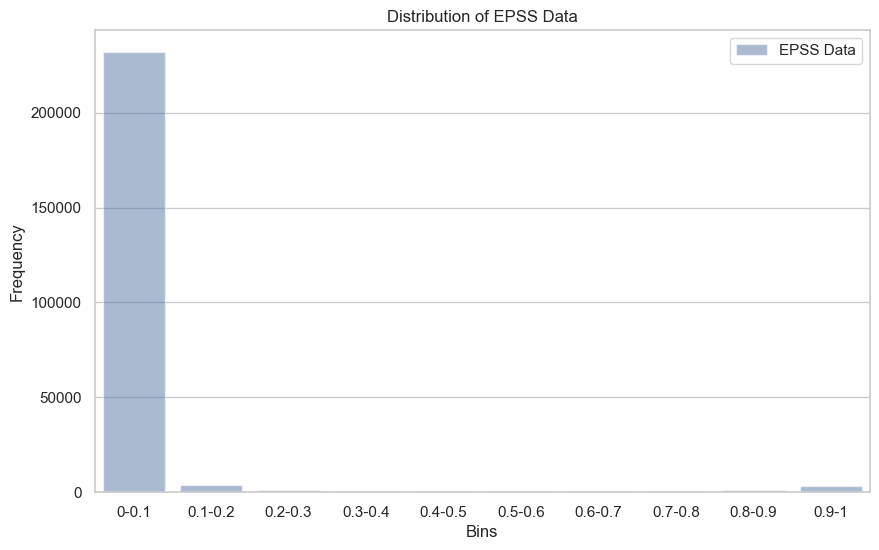

In [17]:
# counts = df['binned'].value_counts(sort=False)
# sns.barplot(x=counts.index, y=counts.values)

import matplotlib.pyplot as plt 

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

counts = df['binned'].value_counts(sort=False)

sns.barplot(x=counts.index, y=counts.values, alpha=0.5, label='EPSS Data')

plt.title('Distribution of EPSS Data')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.legend()

plt.show()